## Bias and Variance

Понимание того, как различные источники ошибок приводят к bias и variance, помогает нам сделать наши модели лучше. Мы определяем смещение и дисперсию тремя способами: концептуально, графически и математически.

### Концептуальное определение

* **Bias**: ошибка из-за смещения принимается как разница между ожидаемым (или средним) прогнозом нашей модели и правильным значением, которое мы пытаемся предсказать. Конечно, у вас есть только одна модель, поэтому говорить об ожидаемых или средних значениях прогноза может показаться немного странным. Однако представьте, что вы можете повторить весь процесс построения модели более одного раза: каждый раз, когда вы собираете новые данные и начинаете новый анализ, создавая новую модель. Из-за случайности в базовых наборах данных получающиеся модели будут иметь ряд предсказаний. Смещение измеряет, насколько далеко прогнозы этих моделей от правильного значения.

* **Variance**: ошибка отклонения принимается за изменчивость прогноза модели для данной точки данных. Опять же, представьте, что вы можете повторить весь процесс построения модели несколько раз. Разница заключается в том, насколько сильно отличаются прогнозы для данной точки в разных реализациях модели.

### Графическое определение

<img src="img/0_bias_variance.jpg" width=60% height=60% align=center>

Представим, что красная точка - это модель, которая дает практически идеальные предсказания. Чем дальше от красной точки - тем хуже ответы с точки зрения метрик качества. Допустим, у нас есть несколько вариантов обучающих выборок, на которых мы строим модели. И тогда возможны следующие варианты:

- Иногда имеем хорошо распределенные и чистые train данные, тогда наши предсказания точны.
- Имеем данные с outlier'ами и т.д.

### Математическое определение

Пусть есть обучающая выборка $X$, $Y$ - таргет. Предположим, что $Y = f(X) + \epsilon$, ошибка $\epsilon$ нормально распределена со средним значением 0, т.е. $\epsilon \in \mathbb{N}(0, \sigma)$

* Предположим, что таргет - сумма какой-то функции $f\left(\textbf{x}\right)$ и ошибки $\epsilon$: $y = f\left(\textbf{x}\right) + \epsilon$;

* Ошибка нормально распределена с какой-то дисперсией и нулевым смещением: $\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$;

* Таргет также нормально распределен: $y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$;

* Ищем аппроксимацию $f\left(\textbf{x}\right)$ - $\widehat{f}\left(\textbf{x}\right)$

Тогда ошибка в точке $x$ выглядит следующим образом:


$$Err(x) = \mathbb{E}[(y - \hat{f}(x))^2] = \mathbb{E}[y^2] + \mathbb{E}[\hat{f}^2] - 2\mathbb{E}[y\hat{y}]$$

Вспомним, что дисперсия это:

$$Var(y) = \mathbb{E}[y^2] - \mathbb{E}[y]^2 \rightarrow$$

$$\mathbb{E}[y^2] = Var(y) + \mathbb{E}[y]^2$$

$$\mathbb{E}[\hat{f}^2] = Var(\hat{f}) + \mathbb{E}[\hat{f}]^2$$


Также вспомним линейность мат. ожидания:

$$\mathbb{E}[y] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = \mathbb{E}[f]$$

$$\mathbb{E}[y\hat{f}] = \mathbb{E}[(f + \epsilon)\hat{f}] = \mathbb{E}[f\hat{f}] + \mathbb{E}[\epsilon\hat{f}] = $$
$$ = f\mathbb{E}[\hat{f}] $$

Подставляя это все в $Err(x)$, получаем:

$$Err(x) = (f - \mathbb{E}[\hat{f}])^2 + Var(\hat{f}) + \sigma^2$$

$$\large Err(x) = Bias(\hat{f})^2 + Var(\hat{f}) + \sigma^2$$

<img src="img/0_bias_curve.jpg" width=60% height=60% align=center>

Математически наиболее оптимальный уровень сложности модели - тот, при котором увеличение bias'а эквивалентно уменьшению variance:

$$ \dfrac{dBias}{dComplexity} = - \dfrac{dVariance}{dComplexity}$$

В контексте решения практических задач можно привести следующую аналогию:

* Уменьшая train error, увеличивая сложность модели - мы уменьшаем bias
* Уменьшая ошибку на валидации/hold-out - мы уменьшаем variance модели

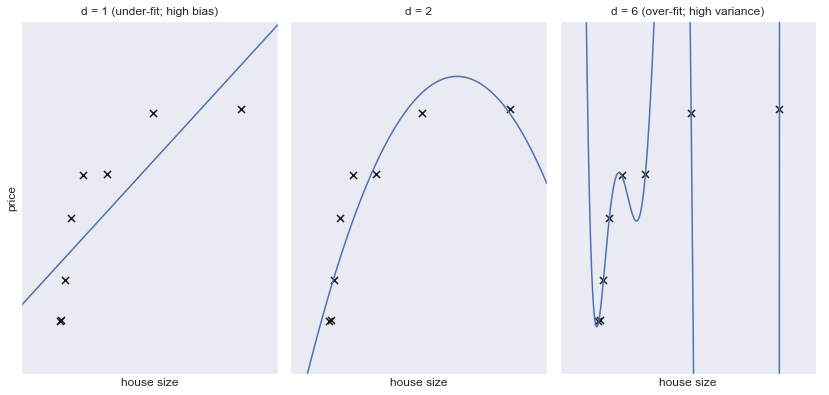

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

n_samples = 8

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['d = 1 (under-fit; high bias)',
          'd = 2',
          'd = 6 (over-fit; high variance)']
degrees = [1, 2, 6]

fig = plt.figure(figsize=(12, 7))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')

    ax.set_title(titles[i])

## Bootstrapping



<img src="img/0_bootstrap.png">

## Bagging

<img src="img/0_bagging.jpeg">

Пусть имеется набор базовых регрессоров $b_i(x)$, $i=1,\dots n$, тогда ошибки этих базовых классификаторов:

$$\varepsilon_i(x) = b_i(x) - y(x), \quad i = 1, \dots, n$$

А MSE в свою очередь:

$$E_x\left[\left(b_i(x) - y(x)\right)^{2}\right] = E_x\left[\varepsilon_i^{2}(x)\right]$$

Средняя ошибка:
$$ E_1 = \frac{1}{n} E_x\left[ \sum_i^n \varepsilon_i^{2}(x)\right]$$

Приведем следующие допущения:

* $E_x\left[\varepsilon_i(x)\right] = 0$ - матожидание ошибок 0
* $E_x\left[\varepsilon_i(x)\varepsilon_j(x)\right] = 0, \quad i \neq j$ - независимость ошибок

Итоговая модель регрессии - усреднение базовых:

$$\large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x)$$

$$E_n = E_x\left[\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\right]^2 = $$
$$= E_x\left[\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\right]^2 \\
=\frac{1}{n^2} E_x\left[\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq j}\varepsilon_i(x)\varepsilon_j(x)\right] = \frac{1}{n}E_1\$$

Итого получаем, что если мы для каждого объекта индивидуально усредняем ответы базовых регрессоров, то при соблюдении допущений MSE уменьшается в n раз.

*Решающие деревья* - хороший выбор для базового классификатора в бэггинге, потому что достаточно сложны по своей структуре и могут достигать нулевой ошибки на обучающей выборке. Используя их вкупе с методом случайных подпространств, можно получить несколько достаточно нескоррелированных классификаторов и как итог, лучшее итоговое качество (когда объединим эти классификаторы в ансамбль).

### Метод случайных подпространств
Алгоритм:

1. Пусть $\ell$ - число объектов в обучающей выборке, $d$ - количество признаков в ней.
2. Пусть $L$ - количество моделей в ансамбле.
3. Для каждой модели $l$ выберем количество используемых ей признаков, обозначим эту величину $d_l$, $d_l \leq d$
4. Для каждой модели $l$ случайно выберем $d_l$ признаков из всех $d$ признаков, представленных в обучающей выборке, и пусть эти признаки будут формировать обучающую выборку для этой модели - $X_l$
5. Обучим $l$-ю модель на выборке $X_l$
6. Сформируем результирующий **ансамбль** из всех этих моделей. Метод предсказания - *голосование моделей* (как правило, по принципу большинства).

### Random Forest

Алгоритм построения леса из $N$ деревьев выглядит так:

Для каждого $k = 1 \dots N$:
1. Генерируем bootstrap sample $X_k$
2. Начинаем строить решающее дерево $b_k$ на выборке $X_k$:
   - На каждом сплите выбираем случайное подмножество признаков $d_l$
   - Из этого подмножества $d_l$ берем тот признак, сплит по которому является наилучшим согласно критерию
   - Строим дерево до тех пор, пока не достигается максимально указанная глубина _max_depth_ или в листьях не оказывается _n_min_ объектов
   
Получаем итоговый ансабмль моделей (лес деревьев):

$$\large a(x) = \frac{1}{N}\sum_{k = 1}^N b_k(x)$$

Для задач классификации - используем голосование по принципу большинства.

Для регрессии - усреднение предсказаний деревьев.

### Эвристики для реальных задач

Для задач классификации рекомендуется брать $d_l = \sqrt{d}$ признаков

Для регрессии - $d_l = \dfrac{d}{3}$

Основная идея алгоритма - получаем большое количество деревьев, переобученных на своих подвыборках, а также в совокупности дающих лучшую оценку, поэтому для классификации рекомендуется не ставить ограничение $n_{min}$ на мин. число объектов в листьях, а для регрессии $n_{min} = 5$

### Пример для классификации

Сгенерируем данные, обучим дерево, BaggingClassifier и Random Forest, также построим разделяющие поверхности
для моделей.

<img src="img/1_classification_example.jpg" height=40% width=40% align=center></img>

Как видно на рисунке выше, разделяющая поверхность для дерева выдает все признаки оверфита. В случае же с RF/Bagging Classifier благодаря усреднению не наблюдается острых углов, перегибов и т.д., что говорит о большей обобщающей способности.

### Пример для регрессии

<img src="img/1_regression_example_1.jpg" height=60% width=60% align=center></img>
<img src="img/1_regression_example_2.jpg" height=60% width=60% align=center></img>

Как чистый бэггинг, так и Random Forest дают лучшее значение MSE по сравнению с одним деревом, если же их сравнивать между собой на данном примере, то обе модели дают сопоставимое значение метрики.

Ключевая разница заключается в том, что на этапе построения деревьев для бэггинга **использовались все признаки** при поиске наилучшего сплита, а для **Ramdom Forest** - на каждом сплите **какое-то случайное подмножество**.

### Variance - деревья и Bagging

В качестве демонстрации на сгенерированном примере - 
<img src="img/1_variance_reduction.jpg">

### Out of Bag Error - OOB

<img src="img/1_oob.png">

Не обязательно использовать кросс-валидацию для оценки качества. Вспомним то, как собираются boostrap выборки.
Пусть у нас в исходном датасете есть $n$ элементов, размер boostrap sample - $\ell$. Значит с вероятностью $\dfrac{1}{l}$ этот элемент попадет в boostrap sample, а с вероятностью $(1 - \dfrac{1}{\ell})^{\ell}$ не попадет (пробовали $\ell$ раз и не получилось).

Вспоминая первый замечательный предел, получаем, что:

$$(1 - \dfrac{1}{\ell}) \rightarrow \dfrac{1}{e}$$

$$ 1 - \dfrac{1}{e} = 63\%$$

In [30]:
np.around(float(11) / 15 * 100, 2)

73.33